Итоговая работа - Хамидуллина Алия МПО01-20-01

In [47]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline
matrix= pd.read_csv('C:/Users/User/Downloads/churn.csv')
matrix.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. Построить гистограмму количества звонков в техническую поддержку

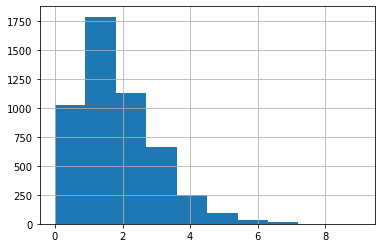

In [48]:
h=df['number_customer_service_calls'].hist()
figura=h.get_figure()

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

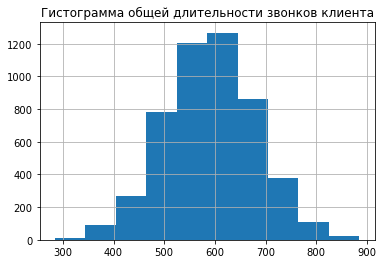

In [49]:
matrix['total_minutes'] = matrix['total_day_minutes'] + matrix['total_eve_minutes'] + matrix['total_night_minutes'] + matrix['total_intl_minutes']
plt.hist(matrix['total_minutes'])
plt.title('Гистограмма общей длительности звонков клиента')
plt.grid(True)
plt.show()


3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [57]:
import math
x = matrix['total_minutes']
y = matrix['number_customer_service_calls']
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [58]:
pearson_def(x,y)

-0.01140791082744116

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

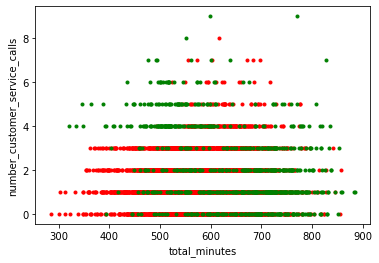

In [59]:
plt.scatter(matrix[matrix['churned']==False]['total_minutes'], matrix[matrix['churned']==False]['number_customer_service_calls'], marker='.',color='r')
plt.scatter(matrix[matrix['churned']==True]['total_minutes'], matrix[matrix['churned']==True]['number_customer_service_calls'], marker='.',color='g')
plt.xlabel('total_minutes')
plt.ylabel('number_customer_service_calls')
plt.show()

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [60]:
matrix1=matrix.sort_values(by='total_minutes', ascending=False)
print("top-5 самых много говорящих клиентов:\n ", matrix1.phone_number.head(5))
print("\ntop-5 самых мало говорящих клиентов:\n ", matrix1.phone_number.tail(5))

top-5 самых много говорящих клиентов:
  985     345-9140
289     352-6976
3205    345-3787
4991    410-3888
4271    370-4667
Name: phone_number, dtype: object

top-5 самых мало говорящих клиентов:
  992     375-8934
1986    405-9233
3779    362-8044
1233    380-5246
648     331-3174
Name: phone_number, dtype: object


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [112]:
matrix['temporary']=1
data = matrix.groupby(by="state").sum()
data["avg_day_charge_per_minute"] = data["total_day_minutes"]/data["total_day_charge"]
data["churn_rate"] = data["churned"]/data["temporary"]*100
data[["avg_day_charge_per_minute", "churn_rate"]]

,avg_day_charge_per_minute,churn_rate
state,,
AK,5.882273,6.944444
AL,5.882303,10.483871
AR,5.882261,17.391304
AZ,5.882241,10.112360
CA,5.882257,26.923077
CO,5.882241,11.458333
CT,5.882287,16.161616
DC,5.882150,10.227273
DE,5.882227,15.957447


7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [61]:
pd.get_dummies(matrix['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [81]:
data=matrix
data=data.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','total_minutes'])
data = pd.get_dummies(data, ['state'])
data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [80]:
from sklearn.model_selection import train_test_split
a,b = data[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'total_intl_minutes', 'total_intl_minutes', 'total_intl_calls',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], data['churned']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)
a_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_minutes,total_intl_calls,state_AK,state_AL,state_AR,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
3311,128,147.7,283.3,188.3,6.9,6.9,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1087,109,217.0,207.0,268.0,8.2,8.2,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4584,25,199.2,123.2,82.3,9.6,9.6,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2759,130,115.6,167.8,141.8,12.6,12.6,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,124,169.3,178.6,242.3,12.2,12.2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(a_train, b_train)

LogisticRegression()

In [96]:
accuracy_score(b_test, logic.predict(a_test))

0.852

In [98]:
precision_score(b_test, logic.predict(a_test))

0.75

In [104]:
recall_score(b_test, logic.predict(a_test))

0.02

In [105]:
f1_score(b_test, logic.predict(a_test))

0.03896103896103896

In [106]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(a_train, b_train)
accuracy_score(b_test, svc_model.predict(a_test))

0.85

In [107]:
precision_score(b_test, svc_model.predict(a_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [108]:
recall_score(b_test, svc_model.predict(a_test))

0.0

In [109]:
f1_score(b_test, svc_model.predict(a_test))

0.0